In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3)
(1, 3, 3, 1)
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


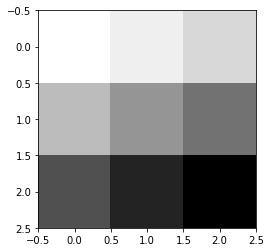

In [ ]:
image = np.array([[[1,2,3],
                   [4,5,6],
                   [7,8,9]]], dtype=np.float32)
print(image.shape)
image = image.reshape(-1, 3, 3, 1)
'''
image = np.array([[[1,2,3],
                   [4,5,6],
                   [7,8,9]]], dype=np.float32)
'''
print(image.shape)
print(image)
plt.imshow(image.reshape(3,3), cmap='Greys')

(1, 3, 3, 1)


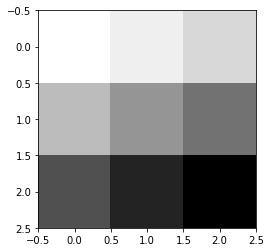

In [ ]:
#4차원의 이미지
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
<class 'numpy.ndarray'>
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
[[12. 16.]
 [24. 28.]]


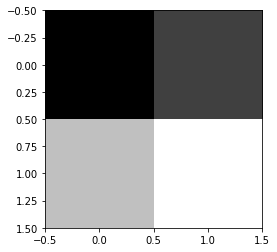

In [ ]:
#tf.nn.conv2d
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print("image.shape", image.shape)

#wight가 커널
weight = tf.constant([[[[1.]],[[1.]]],
                     [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1],
                      padding='VALID')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
print(type(conv2d_img))
print(conv2d_img)

for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(2,2))
  plt.subplot(1, 1, i+1)
  plt.imshow(one_img.reshape(2,2), cmap='gray')

conv2d.shape (1, 4, 4, 2)
[[10. 10.  6.  6.]
 [12. 15. 13. 13.]
 [ 7. 11. 16.  7.]
 [10.  7.  4.  7.]]
[[1.9       2.2       1.6       2.       ]
 [1.4       2.2       2.7       1.7      ]
 [1.7       1.3000001 1.3       1.       ]
 [0.6       1.4000001 1.5       1.4      ]]


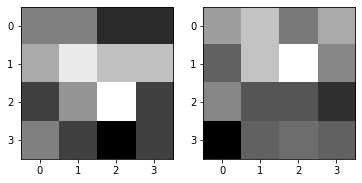

In [ ]:
#2x2 커널 2개 적용 컨볼루션
x_in = np.array([[
                  [[2], [1], [2], [0], [1]],
                  [[1], [3], [2], [2], [3]],
                  [[1], [1], [3], [3], [0]],
                  [[2], [2], [0], [1], [1]],
                  [[0], [0], [3], [1], [2]], ]])
x = tf.constant(x_in, dtype=tf.float32)

# 2x2 커널 2개 적용
kernel_in = np.array([
                      [[[2, 0.1]],[[3, 0.2]] ],
                      [[[0, 0.3]],[[1, 0.4]] ],  ])
kernel = tf.constant(kernel_in, dtype=tf.float32)

conv2d = tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(4,4))
  plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(4,4), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


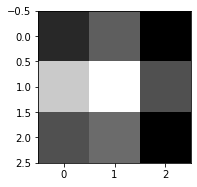

In [ ]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                       [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,2,i+1),plt.imshow(one_img.reshape(3,3), cmap='gray')

(1, 1, 3, 3, 1)


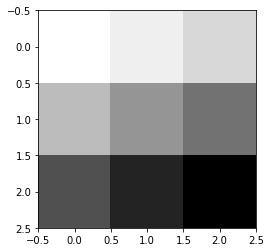

In [ ]:
#필터 3개
image = np.array([[[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]]],dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

image.shape (1, 1, 3, 3, 1)
wegith.shape (2, 2, 1, 3)
conv2d.shape (1, 1, 3, 3, 3)
[[ 12. 120. -12.]
 [ 24. 240. -24.]
 [ 15. 150. -15.]]
[[ 16. 160. -16.]
 [ 28. 280. -28.]
 [ 17. 170. -17.]]
[[  9.  90.  -9.]
 [ 15. 150. -15.]
 [  9.  90.  -9.]]


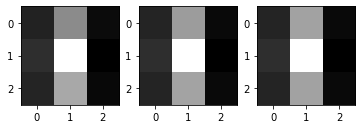

In [ ]:
print("image.shape", image.shape)

weight = tf.constant([[[[1., 10., -1.]],[[1., 10., -1.]]],
                      [[[1., 10., -1.]],[[1., 10., -1,]]]])
print("wegith.shape",weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,3, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [ ]:
#커널이 2, 이미지가 2x2인 맥스풀링
image = np.array([[[[4],[3]],
                   [[2],[1]]]],dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                      strides=[1,1,1,1], padding='VALID')
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [ ]:
image = np.array([[[[4],[3]],
                   [[2],[1]]]],dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                      strides=[1, 1, 1, 1],padding='SAME')
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [ ]:
#학습데이터
import tensorflow as tf
mnist = tf.keras.datasets.mnist

mnist = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)


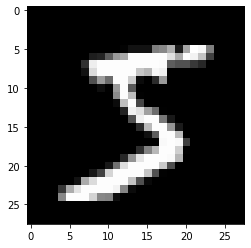

In [ ]:
img = mnist[0][0][0].reshape(28,28)
plt.imshow(img, cmap='gray')
print(img.shape)

(1, 14, 14, 5)


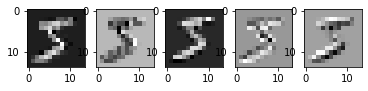

In [ ]:
#필터 크기가 3이고 strides2, 필터 수가 5
#4차원으로 확장
img = img.reshape(-1,28,28,1)
# 3x3의 필터 5개 생성
W1 = tf.Variable(tf.random.normal([3,3,1,5],stddev=0.01))

conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1],padding='SAME')
print(conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
  plt.subplot(1,5,i+1)
  plt.imshow(one_img.reshape(14,14), cmap='gray')

(1, 7, 7, 5)


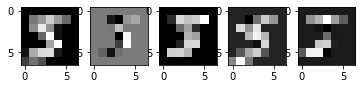

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2 ,2, 1],
                      strides=[1, 2, 2, 1], padding='SAME')
print(pool.shape)

pool_img = np.swapaxes(pool, 0, 3)
for i, one_img in enumerate(pool_img):
  plt.subplot(1,5,i+1)
  plt.imshow(one_img.reshape(7,7), cmap='gray')